# Denoising Autoencoder e Classificador MNIST

## 1. Introdução
Neste notebook, vamos explorar como usar um Denoising Autoencoder (dAE) para pré-treinar um classificador de imagens do dataset MNIST. O objetivo é verificar se o pré-treinamento com o dAE ajuda a melhorar o desempenho da rede neural quando treinamos o classificador com poucos dados rotulados.

---  
## 2. Importação das bibliotecas / Import libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


C:\Users\gbgue\OneDrive\Documentos\projetos\auto-encoder\.venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


---  
## 3. Carregamento e pré-processamento dos dados / Load and preprocess data


In [2]:
(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

# Normalizar pixels para intervalo [0,1]
x_treino = x_treino.astype('float32') / 255.
x_teste = x_teste.astype('float32') / 255.

# Achatar imagens para vetor de 784 pixels
num_pixels = 28 * 28
x_treino = x_treino.reshape((-1, num_pixels))
x_teste = x_teste.reshape((-1, num_pixels))


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


---  
## 4. Adição de ruído / Add noise


In [3]:
ruido = 0.3
x_treino_ruidoso = x_treino + ruido * np.random.normal(loc=0.0, scale=1.0, size=x_treino.shape)
x_teste_ruidoso = x_teste + ruido * np.random.normal(loc=0.0, scale=1.0, size=x_teste.shape)

# Limitar valores para intervalo válido [0,1]
x_treino_ruidoso = np.clip(x_treino_ruidoso, 0., 1.)
x_teste_ruidoso = np.clip(x_teste_ruidoso, 0., 1.)


---  
## 5. Construção do Denoising Autoencoder / Build Denoising Autoencoder


In [4]:
entrada = Input(shape=(num_pixels,), name='entrada')
codificado = Dense(64, activation='relu', name='codificador')(entrada)
decodificado = Dense(num_pixels, activation='sigmoid', name='decodificador')(codificado)
autoencoder = Model(inputs=entrada, outputs=decodificado, name='autoencoder')
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()


Model: "autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ entrada (InputLayer)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ codificador (Dense)             │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ decodificador (Dense)           │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

---  
## 6. Treinamento do Autoencoder / Train Autoencoder


In [5]:
epocas = 50
batch_size = 256
autoencoder.fit(x_treino_ruidoso, x_treino,
                epochs=epocas,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(x_teste_ruidoso, x_teste),
                verbose=2)


Epoch 1/50
235/235 - 1s - 6ms/step - loss: 0.2492 - val_loss: 0.1734
Epoch 2/50
235/235 - 1s - 3ms/step - loss: 0.1543 - val_loss: 0.1369
Epoch 3/50
235/235 - 1s - 3ms/step - loss: 0.1291 - val_loss: 0.1193
Epoch 4/50
235/235 - 1s - 3ms/step - loss: 0.1154 - val_loss: 0.1094
Epoch 5/50
235/235 - 1s - 3ms/step - loss: 0.1079 - val_loss: 0.1041
Epoch 6/50
235/235 - 1s - 3ms/step - loss: 0.1034 - val_loss: 0.1004
Epoch 7/50
235/235 - 1s - 3ms/step - loss: 0.1002 - val_loss: 0.0979
Epoch 8/50
235/235 - 1s - 3ms/step - loss: 0.0978 - val_loss: 0.0961
Epoch 9/50
235/235 - 1s - 3ms/step - loss: 0.0961 - val_loss: 0.0947
Epoch 10/50
235/235 - 1s - 3ms/step - loss: 0.0949 - val_loss: 0.0936
Epoch 11/50
235/235 - 1s - 3ms/step - loss: 0.0937 - val_loss: 0.0926
Epoch 12/50
235/235 - 1s - 3ms/step - loss: 0.0929 - val_loss: 0.0921
Epoch 13/50
235/235 - 1s - 3ms/step - loss: 0.0923 - val_loss: 0.0916
Epoch 14/50
235/235 - 1s - 3ms/step - loss: 0.0918 - val_loss: 0.0911
Epoch 15/50
235/235 - 1s - 3m

---  
## 7. Visualização das imagens reconstruídas / Visualize reconstructions


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


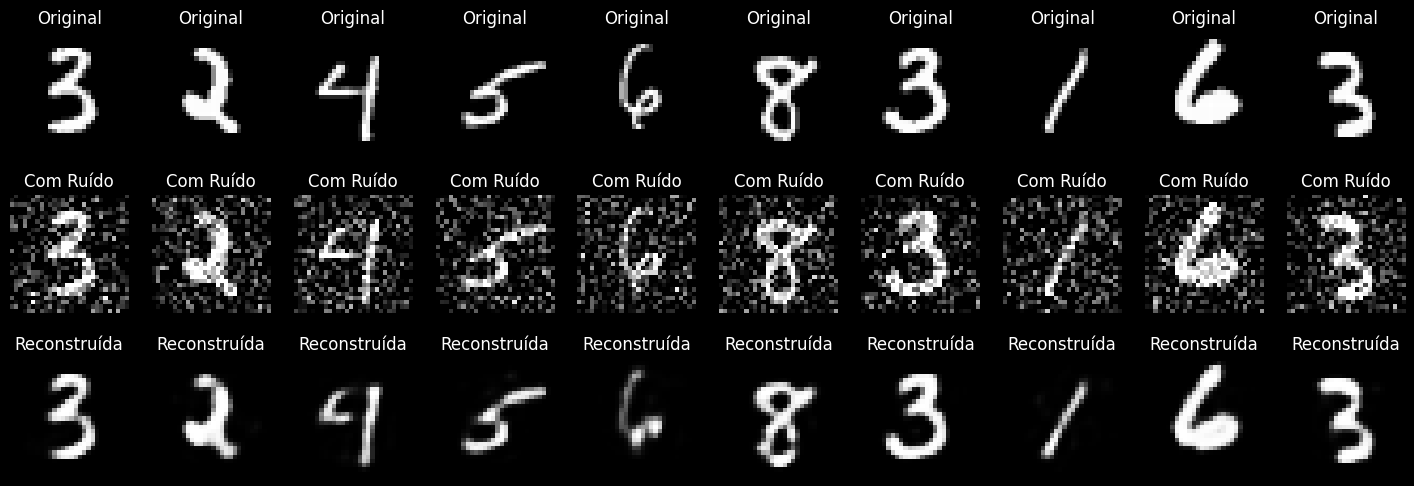

In [6]:
num_imagens = 10
indices = np.random.randint(0, x_teste.shape[0], num_imagens)

imagens_originais = x_teste[indices]
imagens_ruidosas = x_teste_ruidoso[indices]
imagens_reconstruidas = autoencoder.predict(imagens_ruidosas)

import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
for i in range(num_imagens):
    # Original
    ax = plt.subplot(3, num_imagens, i + 1)
    plt.imshow(imagens_originais[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Com ruído
    ax = plt.subplot(3, num_imagens, i + 1 + num_imagens)
    plt.imshow(imagens_ruidosas[i].reshape(28, 28), cmap='gray')
    plt.title("Com Ruído")
    plt.axis('off')

    # Reconstruída
    ax = plt.subplot(3, num_imagens, i + 1 + 2 * num_imagens)
    plt.imshow(imagens_reconstruidas[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstruída")
    plt.axis('off')
plt.show()


---  
## 8. Construção da Rede Neural Profunda (DNN) para classificação / Build DNN classifier


In [7]:
encoder = Model(inputs=entrada, outputs=codificado, name='encoder')
encoder.trainable = False  # Congelar pesos do encoder para treino do classificador

# Selecionar 500 amostras rotuladas para treino
num_amostras = 500
indices_rotulados = np.random.choice(x_treino.shape[0], num_amostras, replace=False)
x_treino_500 = x_treino[indices_rotulados]
y_treino_500 = y_treino[indices_rotulados]

# One-hot encoding das classes
y_treino_500_cat = to_categorical(y_treino_500, 10)
y_teste_cat = to_categorical(y_teste, 10)

# Montar modelo sequencial
modelo_classificador = Sequential(name='classificador_com_encoder')
modelo_classificador.add(encoder)
modelo_classificador.add(Dense(32, activation='relu', name='dnn_oculta'))
modelo_classificador.add(Dense(10, activation='softmax', name='saida'))

modelo_classificador.compile(optimizer=Adam(learning_rate=0.001),
                            loss='categorical_crossentropy',
                            metrics=['accuracy'])
modelo_classificador.summary()


Model: "classificador_com_encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ encoder (Functional)            │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dnn_oculta (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ saida (Dense)                   │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 2,410 (9.41 KB)

 Non-trainable params: 50,240 (196.25 KB)

---  
## 9. Treinamento do classificador / Train classifier


In [8]:
epocas_classif = 50
batch_size_classif = 32

historico = modelo_classificador.fit(
    x_treino_500,
    y_treino_500_cat,
    epochs=epocas_classif,
    batch_size=batch_size_classif,
    validation_data=(x_teste, y_teste_cat),
    verbose=2
)


Epoch 1/50
16/16 - 1s - 52ms/step - accuracy: 0.0880 - loss: 5.3642 - val_accuracy: 0.1158 - val_loss: 3.9647
Epoch 2/50
16/16 - 0s - 17ms/step - accuracy: 0.1280 - loss: 3.3244 - val_accuracy: 0.1931 - val_loss: 2.8580
Epoch 3/50
16/16 - 0s - 18ms/step - accuracy: 0.2520 - loss: 2.5376 - val_accuracy: 0.2887 - val_loss: 2.4115
Epoch 4/50
16/16 - 0s - 18ms/step - accuracy: 0.3260 - loss: 2.1495 - val_accuracy: 0.3429 - val_loss: 2.1275
Epoch 5/50
16/16 - 0s - 18ms/step - accuracy: 0.3860 - loss: 1.8645 - val_accuracy: 0.3971 - val_loss: 1.9009
Epoch 6/50
16/16 - 0s - 17ms/step - accuracy: 0.4420 - loss: 1.6401 - val_accuracy: 0.4532 - val_loss: 1.7237
Epoch 7/50
16/16 - 0s - 17ms/step - accuracy: 0.4800 - loss: 1.4634 - val_accuracy: 0.4994 - val_loss: 1.5776
Epoch 8/50
16/16 - 0s - 18ms/step - accuracy: 0.5600 - loss: 1.3176 - val_accuracy: 0.5382 - val_loss: 1.4580
Epoch 9/50
16/16 - 0s - 18ms/step - accuracy: 0.6120 - loss: 1.1899 - val_accuracy: 0.5703 - val_loss: 1.3620
Epoch 10/5

---  
## 10. Avaliação do modelo / Evaluate model


In [9]:
resultado = modelo_classificador.evaluate(x_teste, y_teste_cat, verbose=0)
print(f"Acurácia no conjunto de teste: {resultado[1]*100:.2f}%")


Acurácia no conjunto de teste: 80.45%


---  
## 11. Conclusão e discussão / Conclusion and discussion

Neste experimento, usamos um Denoising Autoencoder para aprender representações robustas do MNIST usando dados ruidosos. Depois, aproveitamos o encoder treinado para inicializar uma rede neural que classificou dígitos, treinada com apenas 500 imagens rotuladas.

A acurácia obtida mostra que o pré-treinamento ajuda a melhorar o desempenho da rede, especialmente quando os dados rotulados são escassos. Isso porque o autoencoder capturou características gerais dos dígitos, facilitando o aprendizado do classificador com poucos exemplos.

Para melhorar, poderíamos testar diferentes arquiteturas, variar o tipo e nível de ruído, ou aumentar a quantidade de amostras rotuladas. Também seria interessante comparar com uma rede treinada do zero para evidenciar o ganho real do pré-treinamento.
